In [20]:
import pandas as pd
import matplotlib.pyplot as plt

**1. The first exercise familiarizes you with the two data sources for US mortality.**

*a. Use the Compressed or Detailed Mortality tool on Wonder. According to this tool, how many people died in the United States in 2017? What was the (crude, not age-adjusted) death rate?*

<img src="detailed_mortality.png">

So, 2,813,503 people died in the U.S. in 2017. The crude death rate is 863.8.


*b. Download the "public use mortality microdata" found on the NBER’s website for the year 2017. Note that the website helpfully provides a PDF documentation file to help you understand the variables in the dataset. Replicate in a few lines of code the finding in part 1 regarding number of deaths.*

*There is a category/type of death that is included in the Public Use mortality files, but excluded in the official mortality rates published by the CDC and on Wonder. What is it?*

In [2]:
df_restatus = pd.read_csv('mort2017.csv', usecols=['restatus'])
death_counts = df_restatus.groupby('restatus').size()
death_counts

restatus
1    2270626
2     454497
3      88380
4       6531
dtype: int64

In [3]:
death_counts.loc[1] + death_counts.loc[2] + death_counts.loc[3]

2813503

In [4]:
death_counts[death_counts.index != 4].sum()

2813503

The type of death that is included in the Public Use file that is not included in the official U.S. death count (found on Wonder) is “FOREIGN RESIDENTS – State of Occurrence is one of the 50 States or the District of Columbia, but Place of Residence is outside of the U.S.”

You can exclude them using the “restatus” variable, where the value to exclude is “restatus==4.” See above for two ways to do this.

*c. Suppose you were a researcher who wanted to calculate the U.S. crude mortality rate using the number of deaths you just got from public use files. What other number do you need to calculate the rate? Where can you find it? Show that you can calculate the exact same number as the number that which was generated by the CDC Wonder tool.*

You need the total U.S. population. You can find it using CDC Wonder – you can get this population number from the Compressed/Detailed Mortality tool or the the Bridged-Race Population Estimates tool.

The Bridged-Race Population Estimates 1990-2017 tool (as well as the Detailed Mortality tool) gives a U.S. population in 2017 of 325,719,178, so 

$\text{Crude Rate per 100,000} = \frac{2,813,503}{\frac{325,719,178}{100,000}} = 863.78$

Note: Any total U.S. population estimate for 2017 is fine, as long as you clearly state the source you used.

In [5]:
2813503/(325719178/100000)

863.7818065474794

**2. Consider Figure 1 of Case & Deaton (2015).**

*a. Use the Compressed Mortality tool to create a similar (but not identical) graph. You should create a graph that depicts the same years, for the same age group, except instead of ending at 2013, include years from 1990 to 2017. Instead of including USW, USH, and the international comparison lines in they way they do (see the Figure footnote and supporting text), you will generate a graph containing three lines – US-White, US-Black or African American, and US-Other Race.*

In [6]:
df1 = pd.read_csv('Underlying Cause of Death, 1999-2017.txt', sep='\t', usecols=[1, 3, 5, 6])
# drop footer rows where notes appeared
df1 = df1[df1.isnull().sum(axis=1)==0]
df1

,Race,Year,Deaths,Population
0,American Indian or Alaska Native,1999.0,1328.0,313994.0
1,American Indian or Alaska Native,2000.0,1354.0,339081.0
2,American Indian or Alaska Native,2001.0,1559.0,363812.0
3,American Indian or Alaska Native,2002.0,1602.0,380994.0
4,American Indian or Alaska Native,2003.0,1812.0,400054.0
5,American Indian or Alaska Native,2004.0,1739.0,419499.0
6,American Indian or Alaska Native,2005.0,1927.0,440525.0
7,American Indian or Alaska Native,2006.0,1937.0,461264.0
8,American Indian or Alaska Native,2007.0,1958.0,482179.0
9,American Indian or Alaska Native,2008.0,2087.0,502776.0


In [7]:
df1['Race'] = df1['Race'].map({'White': 'White', 'Black or African American': 'Black or African American', 'Asian or Pacific Islander': 'Other Race', 'American Indian or Alaska Native': 'Other Race'})
df_late_years = df1.groupby(['Race', 'Year']).sum()
df_late_years

Deaths  Population
Race                      Year                        
Black or African American 1999.0   31759.0   4059306.0
                          2000.0   33289.0   4230425.0
                          2001.0   34518.0   4498003.0
                          2002.0   35623.0   4678394.0
                          2003.0   37006.0   4847081.0
                          2004.0   36710.0   5006690.0
                          2005.0   37749.0   5168047.0
                          2006.0   37419.0   5310576.0
                          2007.0   36818.0   5451695.0
                          2008.0   35960.0   5581542.0
                          2009.0   35447.0   5694521.0
                          2010.0   34093.0   5763931.0
                          2011.0   33531.0   5783915.0
                          2012.0   32955.0   5763270.0
                          2013.0   32111.0   5736357.0
                          2014.0   31815.0   5709721.0
                          2015.0   31638.0   5695622.0
                          2016.0   32106.0   5685146.0
                          2017.0   31671.0   5676683.0
Other Race                1999.0    4204.0   1755048.0
                          2000.0    4378.0   1856575.0
                          2001.0    4848.0   1998878.0
                          2002.0    4946.0   2095657.0
                          2003.0    5263.0   2192018.0
                          2004.0    5268.0   2280811.0
                          2005.0    5557.0   2374614.0
                          2006.0    5643.0   2470781.0
                          2007.0    5635.0   2566158.0
                          2008.0    5806.0   2669528.0
                          2009.0    6013.0   2770577.0
                          2010.0    6065.0   2835947.0
                          2011.0    6290.0   2894462.0
                          2012.0    6369.0   2950931.0
                          2013.0    6527.0   3015008.0
                          2014.0    6605.0   3122581.0
                          2015.0    6852.0   3218283.0
                          2016.0    6943.0   3273843.0
                          2017.0    7281.0   3387346.0
White                     1999.0  117011.0  30763465.0
                          2000.0  122674.0  31590952.0
                          2001.0  128699.0  32889387.0
                          2002.0  131816.0  33218143.0
                          2003.0  134512.0  33780855.0
                          2004.0  135719.0  34342429.0
                          2005.0  140224.0  34953243.0
                          2006.0  141969.0  35504802.0
                          2007.0  142233.0  35922086.0
                          2008.0  144776.0  36209377.0
                          2009.0  146108.0  36401990.0
                          2010.0  143049.0  36406838.0
                          2011.0  143426.0  36039826.0
                          2012.0  140139.0  35554537.0
                          2013.0  139086.0  35016167.0
                          2014.0  137497.0  34626549.0
                          2015.0  136004.0  34274256.0
                          2016.0  134467.0  33827690.0
                          2017.0  131190.0  33310923.0

In [8]:
df2 = pd.read_csv('Compressed Mortality, 1979-1998.txt', sep='\t', usecols=[1, 3, 5, 6])
df_early_years = df2[df2.isnull().sum(axis=1)==0]
df_early_years

,Race,Year,Deaths,Population
0,Black or African American,1979.0,24646.0,2275000.0
1,Black or African American,1980.0,24816.0,2281648.0
2,Black or African American,1981.0,23675.0,2291771.0
3,Black or African American,1982.0,22531.0,2299776.0
4,Black or African American,1983.0,22328.0,2318506.0
5,Black or African American,1984.0,22098.0,2339465.0
6,Black or African American,1985.0,22486.0,2367008.0
7,Black or African American,1986.0,22648.0,2395350.0
8,Black or African American,1987.0,23001.0,2440872.0
9,Black or African American,1988.0,23632.0,2497580.0


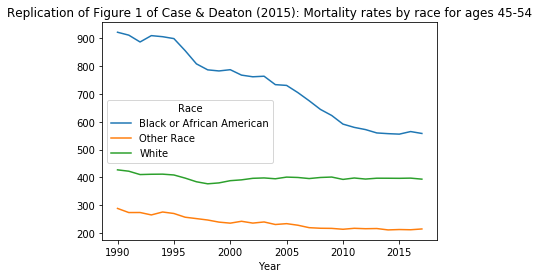

In [9]:
df = pd.concat([df_late_years.reset_index(), df_early_years]).sort_values(['Race', 'Year'])
df = df[df['Year'] >= 1990]
df['Crude Rate'] = df['Deaths'] / (df['Population'] / 100000)
df['Year'] = df['Year'].astype(int)
df_plot = df.set_index(['Race', 'Year'])
df_plot['Crude Rate'].unstack(0).plot(title='Replication of Figure 1 of Case & Deaton (2015): Mortality rates by race for ages 45-54')

*b. Why isn’t it possible using the Compressed Mortality tool to exactly replicate Case & Deaton Fig. 1?*

When you use the tool for the years 1990-1998, there is no ability to break out by both race and Hispanic origin. That means that you couldn’t generate the series for US-White non-Hispanic and US-Hispanic for those years. The ”White” category you can construct would include Hispanic whites.

*c. Examine a Public Use Microdata file and codebook between 1990 and 1998. Describe in detail, without actually doing, the procedure by which you could reconstruct their figure exactly for USW and USH.*

The Public Use Microdata does have information on Hispanic origin before 1998. The procedure you could use would be along these lines, though there are many ways to do this:

1. Load in the public use microdata mortality dataset for 1990.

2. Select all death records for people 45-54 using an age variable like age, ager52, ager27, or ager12. In particular, you could do something like:
  
  df = df[df['ager52'].isin([35, 36])]


3. Select white non-Hispanics and Hispanics using a variable like hspanicr. You could do something like:

  df['WNH'] = (df['hspanicr'] == 6) * 1
  
  df['Hispanic'] = df['hspanicr'].isin([1, 2, 3, 4, 5]) * 1
  
 

4. Drop the non-US residents as we did above: 

  df = df[df['restatus'] != 4]
  

5. Count up the relevant deaths. You could use “collapse, sum” here, or “count.” 

  df = df.groupby(['WNH', 'Hispanic']).count()['restatus']
  

6. Repeat for all years 1990-1998, using a loop.


7. Generate 1999-2017 either in the exact same way, or using the Compressed or Detailed Mortality tool, and append the two datasets.


8. Obtain yearly population data for 45-54 year old White Non-hispanics and Hispanics from Bridged-Race Population Estimates (which has hispanic origin back to 1990), and merge onto your data.


9. Present on graph.

*d. Discuss your figure, and what you learn from it, and compare and contrast with Case and Deaton Figure 1. You may find it helpful to generate a second version of your graph with only two lines – US-White and US-Other, alongside your graph with all three lines. Focus in on the key points/arguments Case and Deaton are making with their version of this graph, and comment on their choice of comparison US racial/ethnic group. How do you think their paper and discussion would have shifted had they included the US-Black or African American line? Do you think that its inclusion undermines or bolsters their point?*

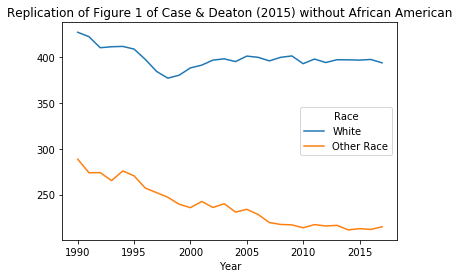

In [10]:
df_plot['Crude Rate'].unstack(0)[['White', 'Other Race']].plot(title='Replication of Figure 1 of Case & Deaton (2015) without African American')

-  Without Black/African American, the graph looks pretty similar to the Case and Deaton version.


-  Their central story about the leveling off of white mortality holds even when Black/African American is included, and stands in contrast to drops for both other races.


-  Including the African American line does alter the focus and complicate the story. There has been a massive drop in African American mortality, supporting their thesis, but also there is a higher absolute level of mortality, which they do not discuss.


-  By not including Black/AA it seems like they are missing recent leveling off and now reversal of Black fortunes - this is potentially a big story. Is it also due to drugs of despair?


-  The graph shows they are centering the experiences of a demographic group (white non hispanics) that is relatively much better off than another key demographic group (African Americans).


**3. Case & Deaton (2017) Figure 7 depicts “Deaths of Despair for White Non-Hispanics with Less Than a Bachelor’s Degree, by Birth Cohort.” Use the Detailed Mortality tool to generate a graph like the bottom left, for suicides.**

*a. Generate the graph and consider it carefully. (Hint: the hard part of this question is figuring out, conceptually, how you should manipulate the data you’ve retrieved from Wonder into a table that can generate this graph. The programming commands themselves are fairly straightforward, and you could also do the data manipulation in Excel if you are still at a beginner level with Python/Stata/R.)*

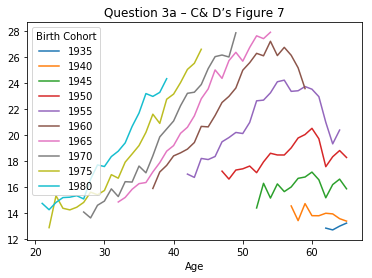

In [19]:
df = pd.read_csv('Underlying Cause of Death, 1999-2017 - single year ages.txt', sep='\t', usecols=[1,4,5,6])
df = df[df.isnull().sum(axis=1)==0]
df['Year'] = df['Year'].astype(int)

df = df[df['Single-Year Ages Code']!='NS']
df['Age'] = df['Single-Year Ages Code'].astype(int)

df = df[df['Population']!='Not Applicable']
df['Population'] = df['Population'].astype(int)


df['Birth Year'] = df['Year'] - df['Age']
df['Birth Cohort'] = (5 * round(df['Birth Year']/5)).astype(int)

df = df.groupby(['Birth Cohort', 'Age']).sum()[['Deaths', 'Population']]
df['Rate'] = df['Deaths']/(df['Population']/100000)
df = df[~df.index.isin([1915, 1920, 1925, 1930, 1985, 1990, 1995, 2000, 2005, 2010, 2015], level='Birth Cohort')]
df = df.query('21 <= Age <= 65')['Rate']
df.unstack(0).plot(title='Question 3a – C& D’s Figure 7')

*b. Name several things you learn from the graph. Be specific. Consider what we have discussed in class about the Case & Deaton thesis with regards to educational attainment, and speculate about what this graph might look like if we could split it into one graph for people with less than a Bachelor’s, and a second graph for people with a Bachelor’s degree or more.*

We see that there is a steepening age-mortality profile in suicides – at younger birth cohorts, mortality is higher in level than their parents at the same age. Further, there is a steeper increasing trend as they age – a “steepening of the age-mortality profile.”

We see this pattern show up even though we have not separated out by education. From Case and Deaton’s work we think that the relationship for people with a Bachelor’s degree would be flatter and look more like a straight increasing line, with no differences by cohort – no fanning out like the above. That the relationship is showing up despite our inability to separate by education suggests that the graph for people without a bachelor’s degree would be even more extreme than the one depicted above in Figure 4.

It’s interesting to note that when we don’t separate out by educational attainment, we do not need to be concerned about the bias we talked about in class – “lagged selection bias.” Because we know that this graph was not generated by a severe lagged selection bias problem; this bolsters the Case and Deaton case that the phenomenon is real, and centered in people with less than a Bachelor’s degree.